# Спринт 8 «Сборный Проект - 1»

## Навигация

1. [Описание проекта](#Описание-проекта)
1. [Описание данных](#Описание-данных)
1. [Предобработка данных](#Предобработка-данных)
1. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
1. [Портрет пользователя каждого региона](#Портрет-пользователя-каждого-региона)
1. [Проверка гипотез](#Проверка-гипотез)
1. [Общие выводы](#Общие-выводы)

## Описание проекта

[к навигации](#Навигация)

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

[к навигации](#Навигация)

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
sns.set_theme()

In [2]:
data = pd.read_csv(os.path.join('..', 'datasets', 'games.csv'))
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Предобработка данных

[к навигации](#Навигация)

**Заменим названия столбцов**

In [4]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Преобразуем данные к нужным типам**

In [5]:
# data['platform'] = data['platform'].astype('category')  # явные категории
# data['genre'] = data['genre'].astype('category')  # явные категории
# data['rating'] = data['rating'].astype('category')  # явные категории
# data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


**Обработаем пропуски**

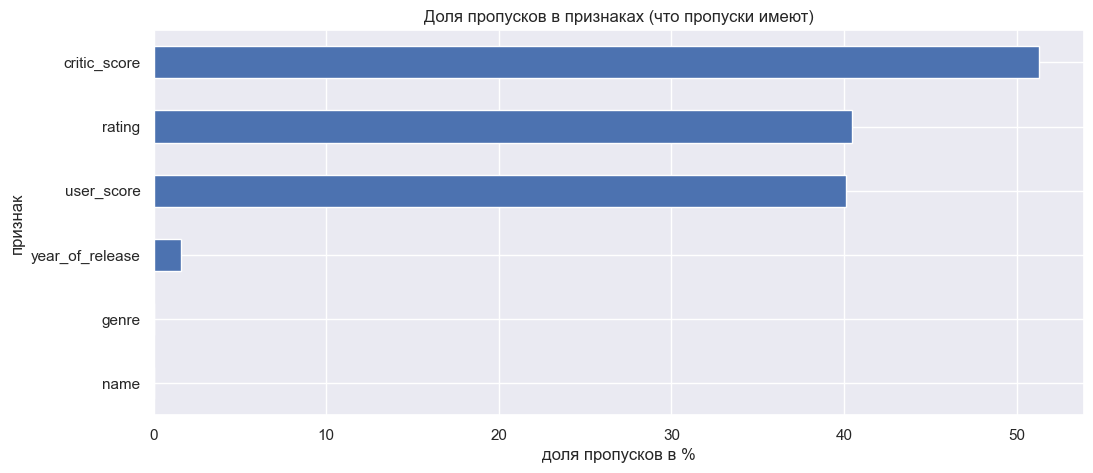

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
(
    (data.isna().mean() * 100)
    .to_frame()
    .rename(columns={0: 'space'})
    .query('space > 0')
    .sort_values('space')
    .plot(kind='barh', legend=False, ax=ax)
)
ax.set(title='Доля пропусков в признаках (что пропуски имеют)', xlabel='доля пропусков в %', ylabel='признак');

- `critic_score`: Доля пропусков превышает 50%. Думаю, что заполнять средним или медианным в таком случае некорректно. Скорее всего для многих фильмов вообще нет оценки критиков.
- `rating`: Доля пропусков превышает 40%. Думаю, что заполнять средним или медианным в таком случае некорректно. Скорее всего данный признак рассчитывается по пользовательским оценкам. В них такая же доля пропусков.
- `user_score`: Доля пропусков превышает 40%. Думаю, что заполнять средним или медианным в таком случае некорректно. Быть может это новые фильмы или старые, для которых ещё нет пользовательских оценок.
- `name`: Есть 2 пропуска, но здесь заполнять бессмысленно: имя игры уникально. Не представляю, откуда могли взяться пропуски.
- `year_of_release`: Сложно представить, как можно заполнить. Если только не идти гуглить ...
- `genre`: Есть 2 пропуска в столбце. Сложно заполнить без экспертной оценки. Как будто легче удалить эти строчки. Не представляю, откуда могли взяться пропуски.

In [8]:
data['rating'] = data['rating'].fillna('Unknown')

`tbd` - To Be Decided. То есть пока без оценки. Мне кажется, что можно заменить на NaN.

In [9]:
is_tbd = data['user_score'] == 'tbd'
data['is_tbd'] = is_tbd.astype('int')
# data.loc[is_tbd, 'user_score'] = np.NaN
data['user_score'] = data['user_score'].replace('tbd', np.NaN).astype('float')
# data['user_score'] = data['user_score'].astype('float')

**Посчитаем суммарные продажи во всех регионах и запишием их в отдельный столбец**

In [10]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

**Выводы:**
- Было проведено нормирование названий столбцов: все они были приведены к snake_case.
- Столбец `year_of_release` был приведён к формату `datetime`
- Пропуски присутствуют в столбцах `critic_score`, `rating`, `user_score`, `name`, `year_of_release`, `genre`. Ни в одном столбце корректно пропуски обработать невозможно.  
- В `genre` пропуски были заменены на `'Unknown'` для более комфортной обработки при визуализации.

## Исследовательский анализ данных

[к навигации](#Навигация)

**Посмотрим, сколько игр выпускалось в разные годы.**

По графику можно определить, что до 1994 года игр почти не выпускалось.

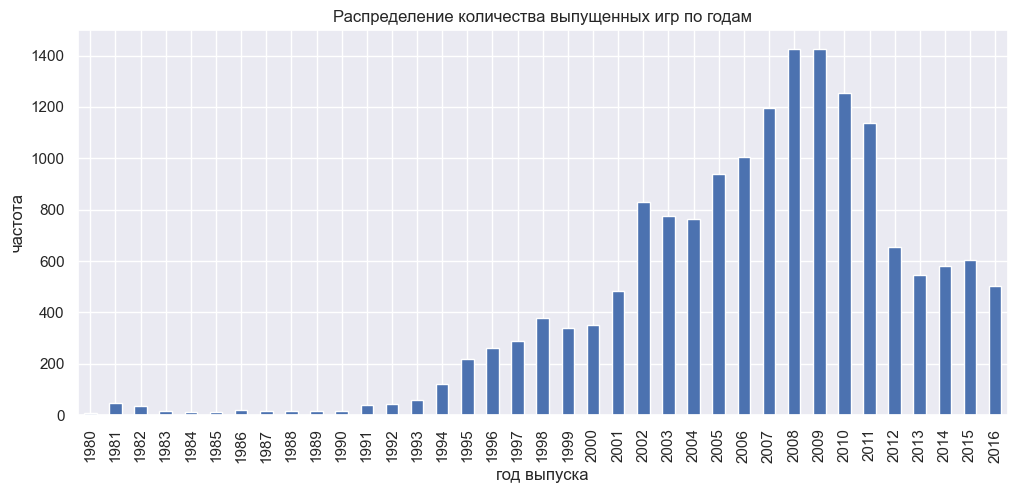

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
data.groupby('year_of_release')['name'].count().plot(kind='bar', ax=ax)
ax.set(xlabel='год выпуска', ylabel='частота', title='Распределение количества выпущенных игр по годам');

**Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.**

In [12]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales[:5]

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

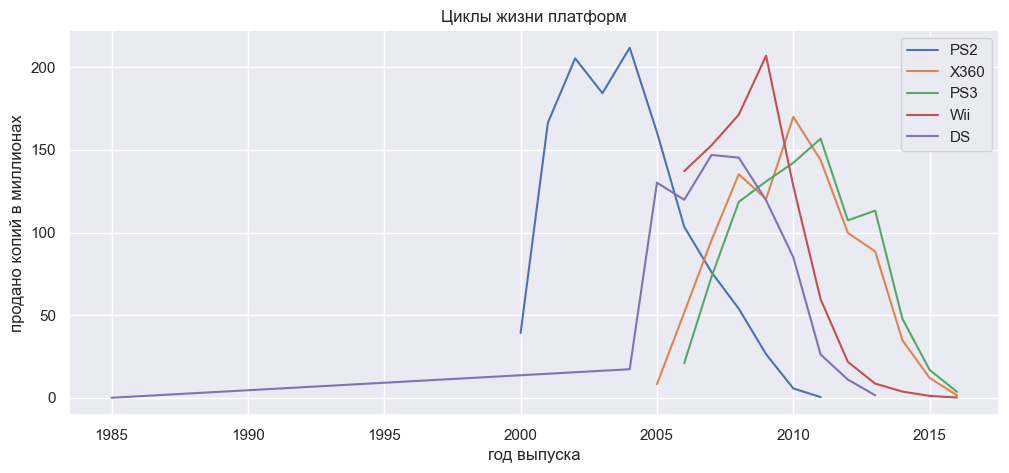

In [13]:
fig, ax = plt.subplots(figsize=(12, 5))
for platform in platform_sales.index[:5]:
    (
        data.query(f'platform == "{platform}"')
        .groupby('year_of_release')['total_sales'].sum()
        .plot(label=platform, legend=True, ax=ax)
    )
ax.set(title='Циклы жизни платформ', xlabel='год выпуска', ylabel='продано копий в миллионах');

Цикл жизни платформы составляет лет 10.

In [14]:
sample = data.query('year_of_release > 2013')

**Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.**

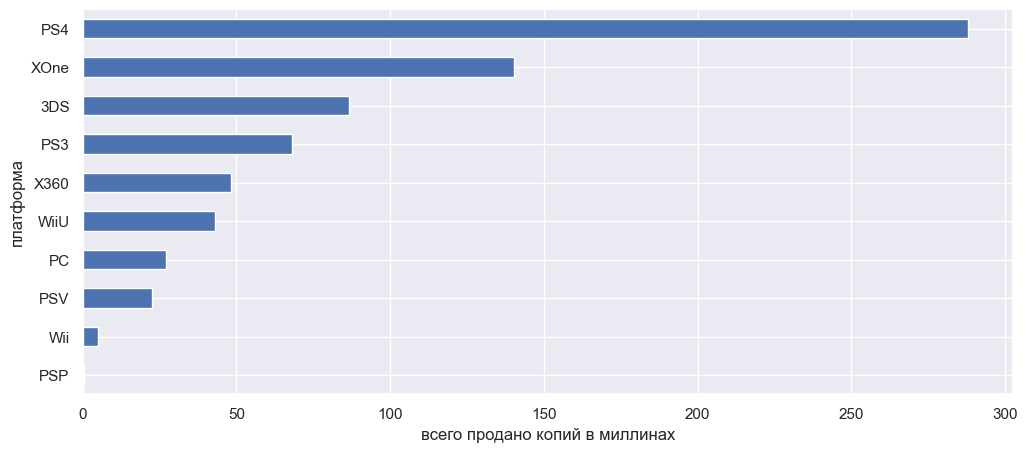

In [15]:
# выбираем платформы с наибольшими продажами
fig, ax = plt.subplots(figsize=(12, 5))
sample.groupby('platform')['total_sales'].sum().sort_values().plot(kind='barh', ax=ax)
ax.set(xlabel='всего продано копий в миллинах', ylabel='платформа');

In [16]:
sample = sample[sample['platform'].isin(['PS4', 'PS3', 'XOne', '3DS', 'X360'])]

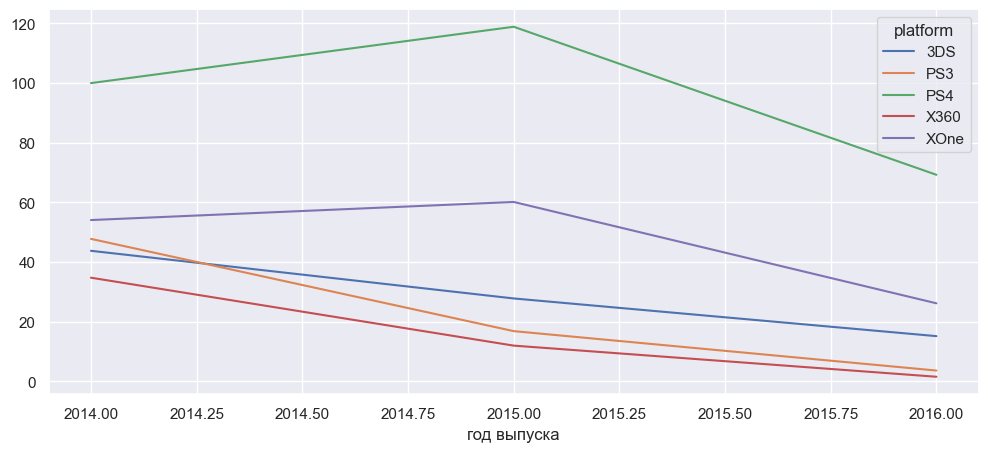

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))
sample.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack('platform').plot(ax=ax)
ax.set(xlabel='год выпуска');

**Построим `boxplot` по глобальным продажам игр в разбивке по платформам.**

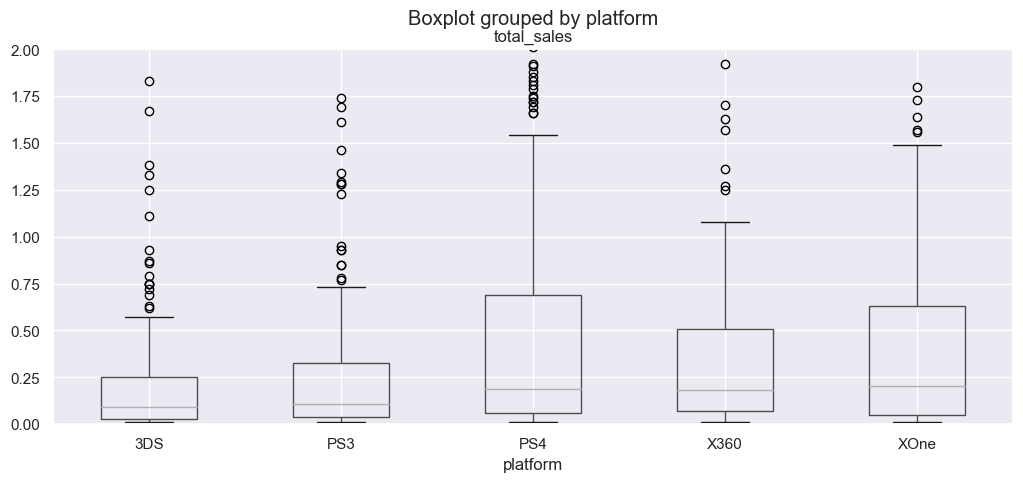

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
sample.boxplot(by='platform', column='total_sales', ax=ax)
ax.set(ylim=(0, 2));

По графику видно, что самый "широкий" ящик и с самой большой верхнейй границей у PS4.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

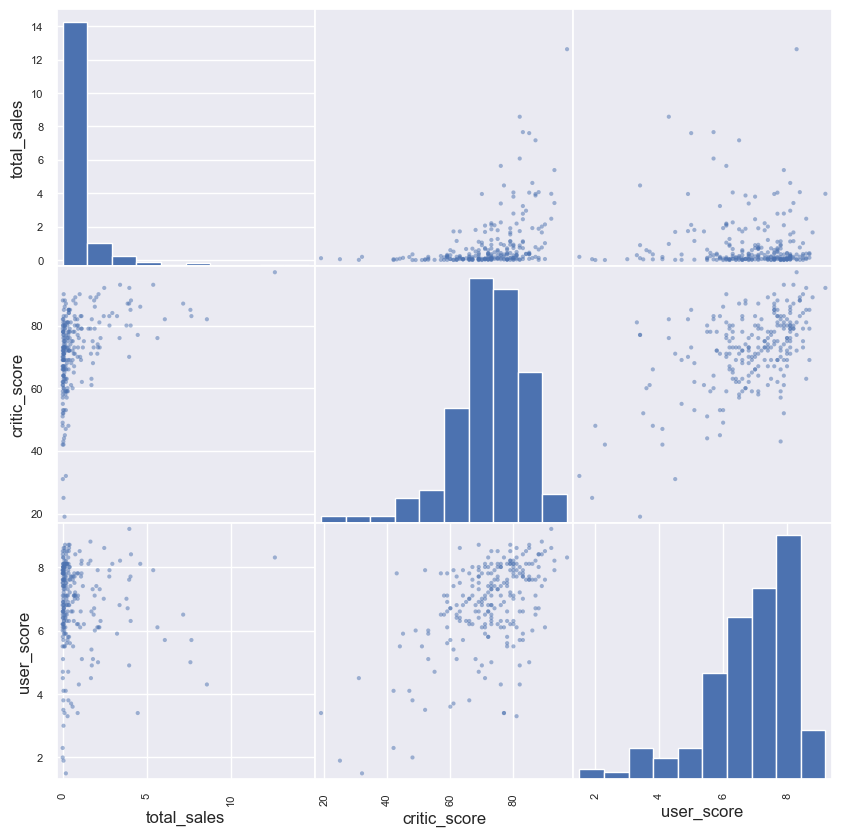

In [19]:
axes = pd.plotting.scatter_matrix(
    sample.query('platform == "PS4"')[['total_sales', 'critic_score', 'user_score']], figsize=(10, 10))

In [20]:
print(sample.query('platform == "PS4"')['total_sales'].corr(sample['critic_score']))
print(sample.query('platform == "PS4"')['total_sales'].corr(sample['user_score']))

0.40266141068104083
-0.04013158947269735


**Выводы:**
Есть слабая корреляция между продажами и отзывами критиков.  
Корреляции между отзывами пользователей и продажами почти нет.

**Соотнесём выводы с продажами игр на других платформах**

In [21]:
print(sample.query('platform == "PS3"')['total_sales'].corr(sample['critic_score']))
print(sample.query('platform == "PS3"')['total_sales'].corr(sample['user_score']))

0.44657460493190704
-0.16676141347662116


In [22]:
print(sample.query('platform == "X360"')['total_sales'].corr(sample['critic_score']))
print(sample.query('platform == "X360"')['total_sales'].corr(sample['user_score']))

0.5257228356581521
-0.138444570945665


In [23]:
print(sample.query('platform == "XOne"')['total_sales'].corr(sample['critic_score']))
print(sample.query('platform == "XOne"')['total_sales'].corr(sample['user_score']))

0.42867694370333237
-0.07038392806475809


По остальным платформам результаты схожие

**Посмотрим на общее распределение игр по жанрам.**

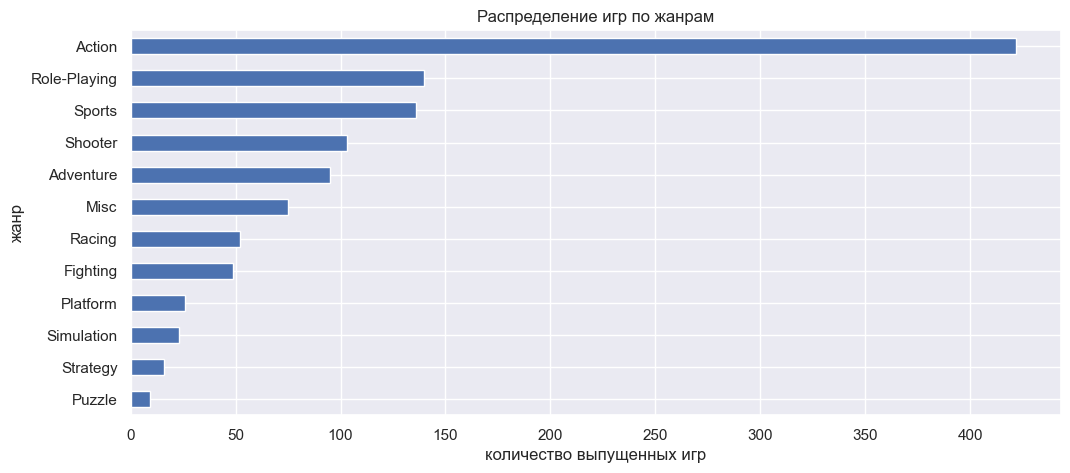

In [24]:
fig, ax = plt.subplots(figsize=(12, 5))
sample.groupby('genre')['name'].count().sort_values().plot(kind='barh', ax=ax)
ax.set(title='Распределение игр по жанрам', xlabel='количество выпущенных игр', ylabel='жанр');

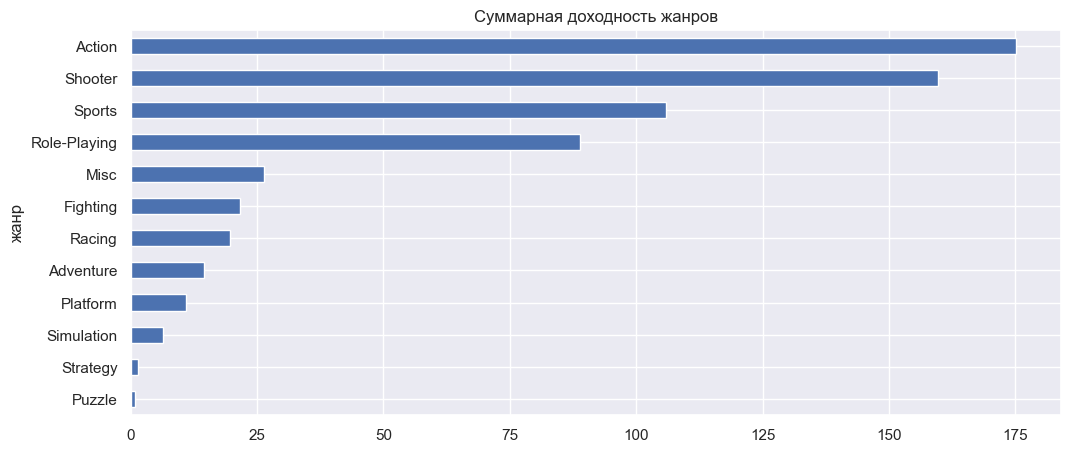

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
sample.groupby('genre')['total_sales'].sum().sort_values().plot(kind='barh', ax=ax)
ax.set(title='Суммарная доходность жанров', ylabel='жанр');

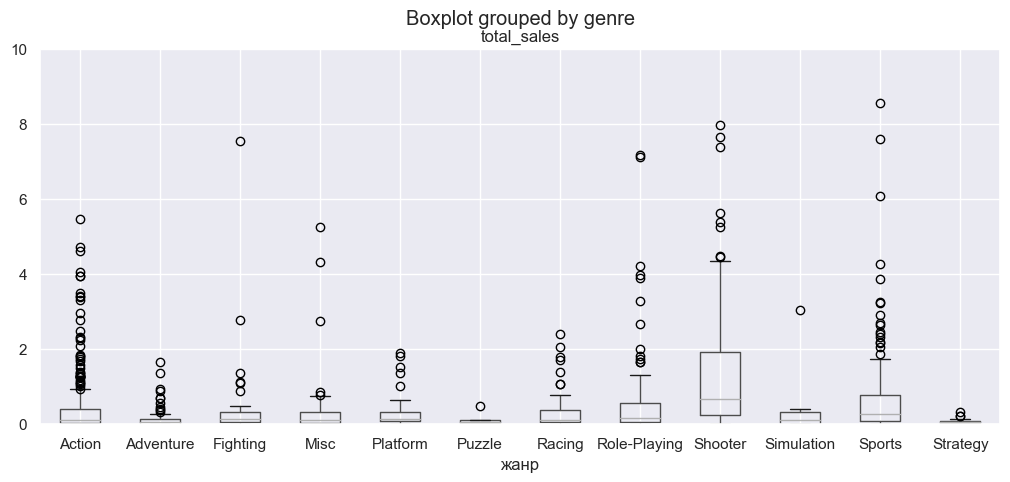

In [26]:
fig, ax = plt.subplots(figsize=(12, 5))
sample.boxplot(by='genre', column='total_sales', ax=ax)
ax.set(xlabel='жанр', ylim=(0, 10));

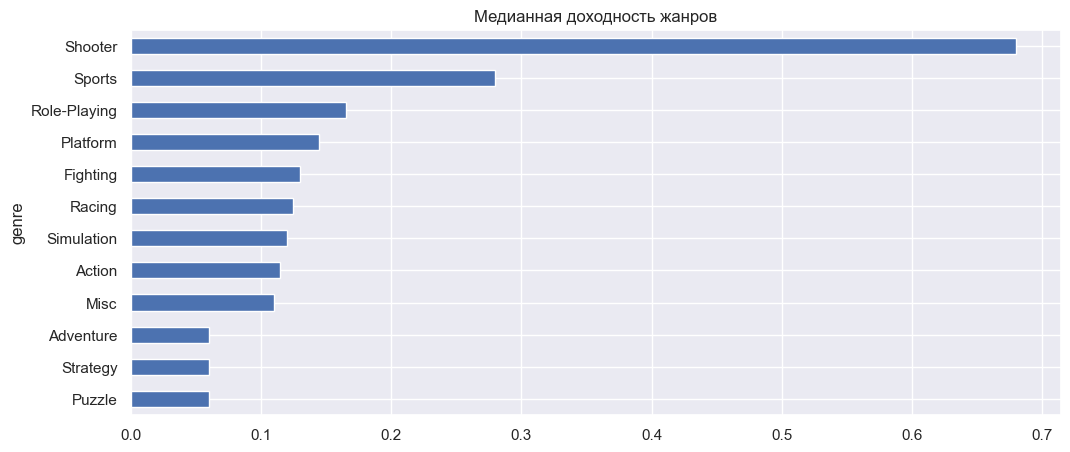

In [27]:
fig, ax = plt.subplots(figsize=(12, 5))
sample.groupby('genre')['total_sales'].median().sort_values().plot(kind='barh', ax=ax)
ax.set(title='Медианная доходность жанров');

О прибыльности жанров можно судить по графику выше: больше всего игр делается в жанре `action`, он жезарабатывает суммарно больше всего денег.

Однако же медианные показатели прибыльности игр выше всего у жанра `shooter`.

## Портрет пользователя каждого региона

[к навигации](#Навигация)

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

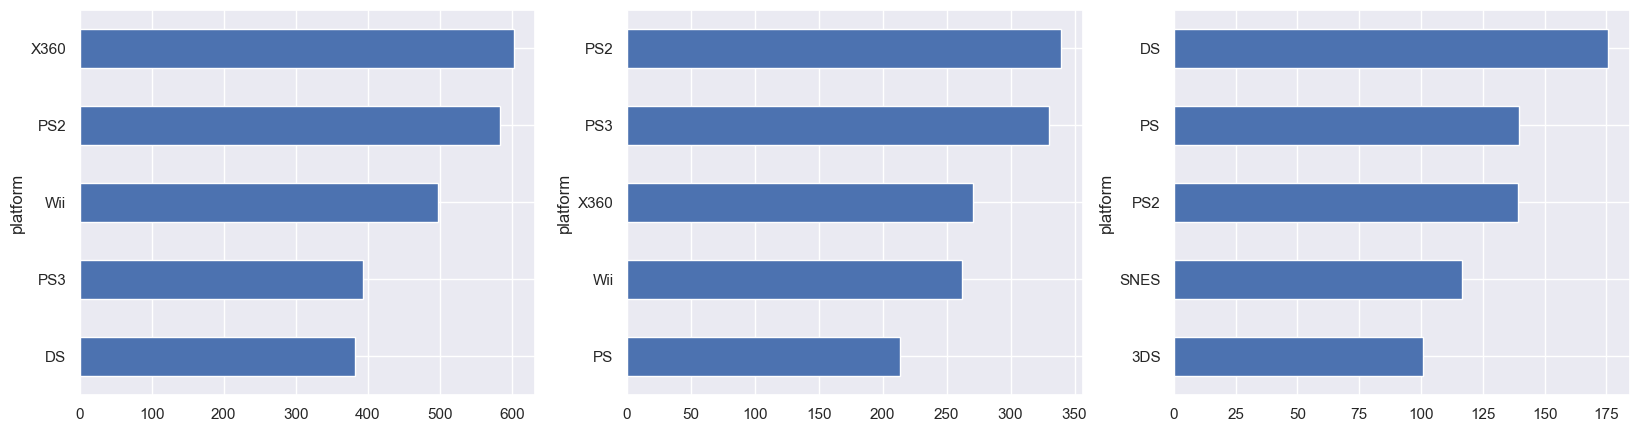

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
data.groupby('platform')['na_sales'].sum().sort_values()[-5:].plot(ax=axes[0], kind='barh')
data.groupby('platform')['eu_sales'].sum().sort_values()[-5:].plot(ax=axes[1], kind='barh')
data.groupby('platform')['jp_sales'].sum().sort_values()[-5:].plot(ax=axes[2], kind='barh')
plt.show()

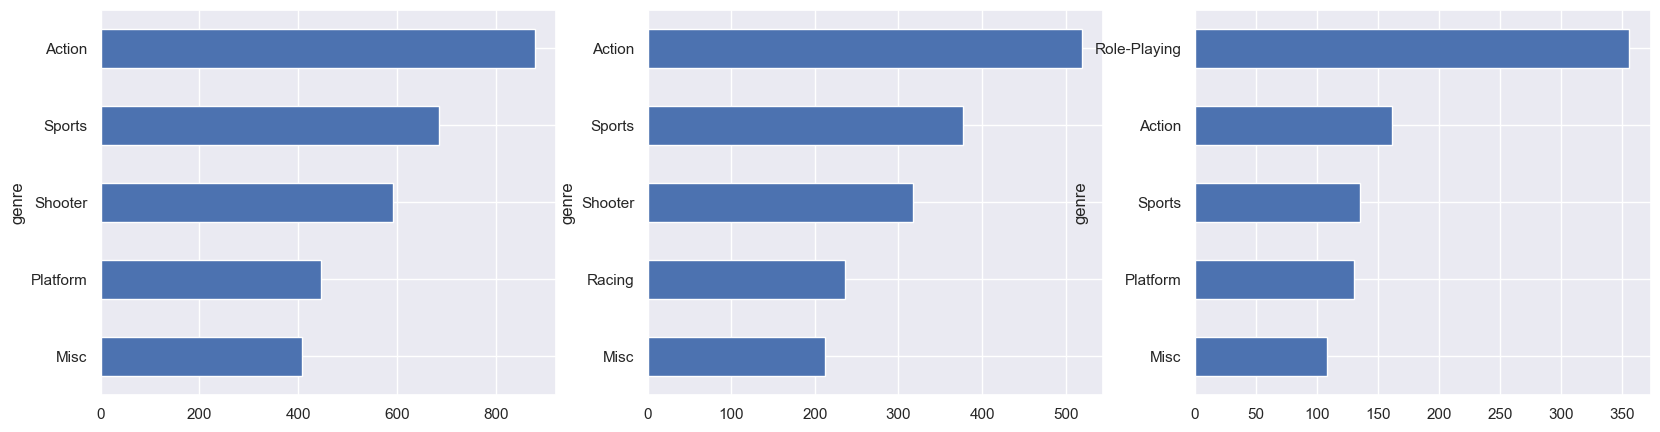

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
data.groupby('genre')['na_sales'].sum().sort_values()[-5:].plot(ax=axes[0], kind='barh')
data.groupby('genre')['eu_sales'].sum().sort_values()[-5:].plot(ax=axes[1], kind='barh')
data.groupby('genre')['jp_sales'].sum().sort_values()[-5:].plot(ax=axes[2], kind='barh');

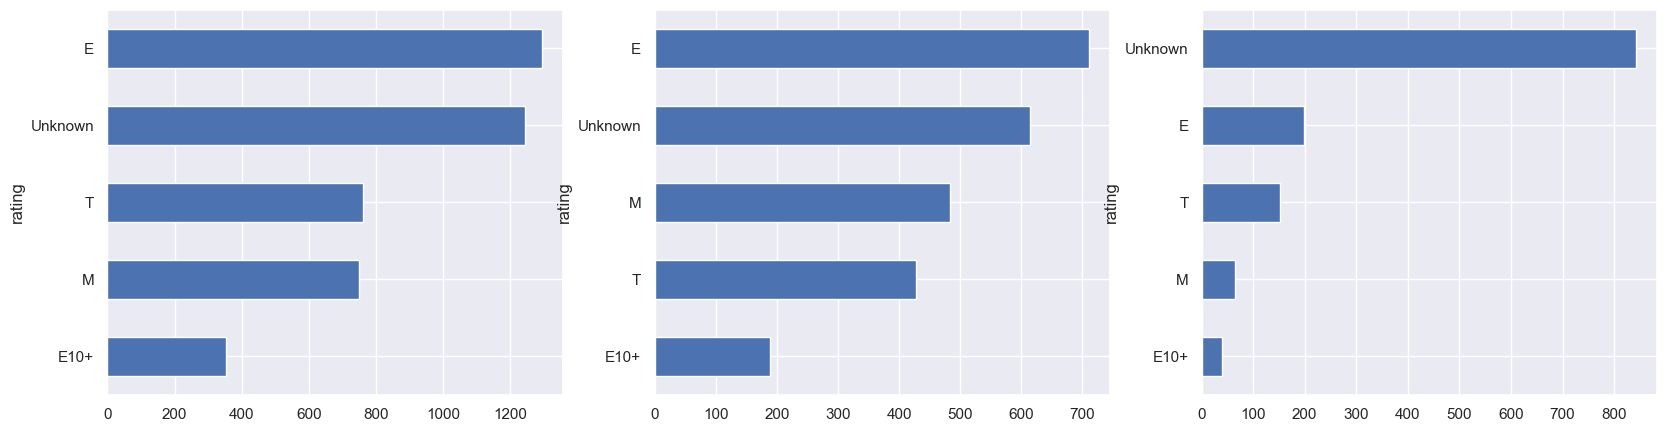

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
data.groupby('rating')['na_sales'].sum().sort_values()[-5:].plot(ax=axes[0], kind='barh')
data.groupby('rating')['eu_sales'].sum().sort_values()[-5:].plot(ax=axes[1], kind='barh')
data.groupby('rating')['jp_sales'].sum().sort_values()[-5:].plot(ax=axes[2], kind='barh');

**Выводы:**
В Северной Америке и Европе рейтинги зарабатывают почти в одинаковом соотношении. Только M и T меняются местами.  
А вот в Японии на первом месте с большим отрывом идут игры без рейтинга.

## Проверка гипотез

[к навигации](#Навигация)

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

H_0: Средние `user_score` для XOne = Средние `user_score` для PC  
H_1: Средние `user_score` для XOne ≠ Средние `user_score` для PC

In [31]:
sample = data[data['user_score'].notna()]

alpha = .05

results = st.ttest_ind(
    sample[sample['platform'] == 'XOne']['user_score'],
    sample[sample['platform'] == 'PC']['user_score'],
    equal_var=False,
)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

4.935072360183574e-06
Отвергаем нулевую гипотезу


То есть рейтинги не одинаковы

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

H_0: Средние `user_score` для Action = Средние `user_score` для Sports  
H_1: Средние `user_score` для Action ≠ Средние `user_score` для Sports

In [32]:
sample = data[data['user_score'].notna()]

alpha = .05

results = st.ttest_ind(
    sample[sample['genre'] == 'Action']['user_score'],
    sample[sample['genre'] == 'Sports']['user_score'],
    equal_var=False,
)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

0.11483818791498286
Не отвергаем нулевую гипотезу


То есть рейтинги одинаковые

Нулевые гипотезы формировал на равенство. Применял критерий Стьюдента на равенство распределений.

## Общие выводы

[к навигации](#Навигация)

1. У платформ есть цикл жизни. Стоит продавать игры для приставок PS4, XOne, X360, PS3 и 3DS (приоритетность соответствует порядку). Они ещё живы)
2. По медианной доходности больше всего зарабатывают игры в жанре "Shooter".
3. В зависимости от региона разняться популярности приставки, жанры игр и рейтинги. Топ-5 популярных платформ в NA: X360, PS2, Wii, PS3, DS. Топ-5 популярных платформ в EU: PS2, PS3, X360, Wii, PS. Топ-5 популярных платформ в JP: DS, PS, PS2, SNES, 3DS. Топ-5 популярных жанров в NA: Action, Sports, Shooter, Platform, Misc. Топ-5 популярных платформ в EU: Action, Sports, Shooter, Racing, Misc. Топ-5 популярных платформ в JP: Role-Playing, Action, Sports, Platform, Misc.
4. Есть основания утверждать, что средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.
5. А вот средние пользовательские рейтинги жанров Action и Sports значимо не различаются.